In [148]:
import numpy as np 
import random
from matplotlib import pyplot as plt

# EX01

In [149]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter = ",", skip_header=1).tolist()
    N = len(data)
    
    # get tv (index = 0)
    tv_data = get_column(data,0)
    
    # get radio (index = 1)
    radio_data = get_column(data,1)
    
    # get newspaper (index = 2)
    newspaper_data = get_column(data,2)
    
    # sales data (index = 3)
    sales_data = get_column(data,3)
    
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

# Ex 1 solution:
X, y = prepare_data("advertising.csv")
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# EX2

In [150]:
def initialize_params():
    w1 = random.gauss(mu= 0.0, sigma = 0.01)
    w2 = random.gauss(mu= 0.0, sigma = 0.01)
    w3 = random.gauss(mu= 0.0, simga = 0.01)
    b = 0
    return w1, w2, w3, b    

In [151]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,0.0070783670518262355, -0.002307860847821344, 0)
    return w1,w2, w3, b

In [152]:
def predict(x1, x2, x3, w1, w2, w3, b):
    y = x1 * w1 + x2 * w2 + x3 * w3 + b
    return y

In [153]:
def compute_loss(y, y_hat):
    if isinstance(y_hat, (int, float)):
        loss = np.square(y_hat - y)
    else:
        loss = np.square(y_hat - y) / len(y_hat)
    return loss

def compute_loss_mae(y_hat,y):
    if isinstance(y_hat, (int, float)):
        loss = np.abs(y_hat - y)
    else:
        loss = np.abs(y_hat - y) / len(y_hat)
    return loss   

In [154]:
def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat -y)

In [155]:
def update_weight_wi(wi, dl_dw, lr):
    wi = wi - dl_dw * lr
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - dl_db * lr
    return b

In [156]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2 , w3, b = initialize_params()
    
    if isinstance(y_data, (int, float)):
        N = 1
    else:
        N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss(y, y_hat)
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameters:
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db,lr)
            
            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

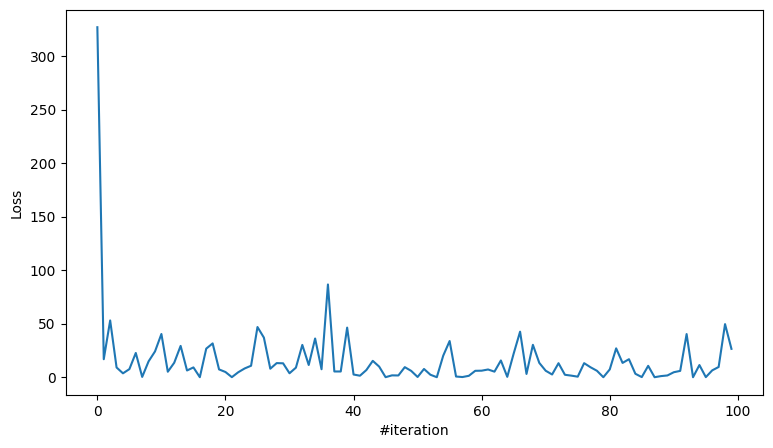

In [157]:
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
fig , ax = plt.subplots(figsize = (9,5))
ax.plot(losses[:100])
ax.set_xlabel("#iteration")
ax.set_ylabel("Loss")
plt.show()

In [158]:
# Ex 02 solution:
y = predict(x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5 , w3 =0, b =0.5)
print(y)

1.0


In [159]:
# Ex 03 solution:
l = compute_loss(y_hat = 1, y = 0.5)
print(l)

0.25


In [160]:
# Ex 04 solution:
g_wi = compute_gradient_wi(xi =1.0, y = 1.0, y_hat = 0.5)
print(g_wi)

-1.0


In [161]:
# Ex 05 solution:
g_b = compute_gradient_b(y =2.0, y_hat = 0.5)
print(g_b)


-3.0


In [162]:
# Ex 06 solution:
after_wi = update_weight_wi(wi = 1.0, dl_dw = -0.5, lr = 1e-5)
print(after_wi)

1.000005


In [163]:
# Ex 07 solution:
after_b = update_weight_b(b = 0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

0.50001


In [164]:
# Ex 08 solution:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [165]:
# Ex 09 solution:
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data("advertising.csv")
(w1,w2,w3,b, losses)= implement_linear_regression(X,y,epoch_max=50, lr=1e-5)
sales = predict(tv,radio,newspaper,w1,w2,w3,b)
print(f"predicted sales is {sales}")

predicted sales is 8.176413319549823


In [166]:
# Ex 10 solution:
l = compute_loss_mae(y_hat=1, y = 0.5)
print(l)

0.5


# EX03

In [167]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2 , w3, b = initialize_params()
    
    if isinstance(y_data, (int, float)):
        N = 1
    else:
        N = len(y_data)
    for _ in range(epoch_max):
        loss_total = 0.0
        dw1_total =  0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss(y, y_hat)
            
            # accumulate loss:
            loss_total += loss
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)/N
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)/N
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)/N
            dl_db = compute_gradient_b(y, y_hat)/N
            
            # accumulate gradients:
            
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            
            # update parameters:
        w1 = update_weight_wi(w1, dw1_total, lr)
        w2 = update_weight_wi(w2, dw2_total, lr)
        w3 = update_weight_wi(w3, dw3_total, lr)
        b = update_weight_b(b, db_total,lr)
            
        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.40816747451335, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323429, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322555, 12.58854742072041, 12.432904005847659, 12.28173098820129, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

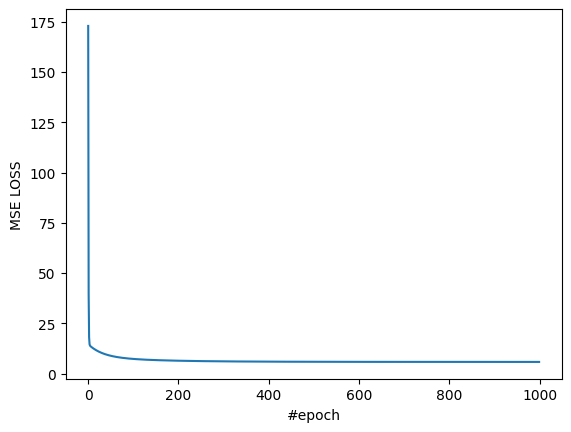

In [168]:
(w1 ,w2 ,w3 ,b, losses ) = implement_linear_regression_nsamples (X, y, epoch_max =1000 , lr =1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE LOSS")
plt.show()

In [169]:
# Ex 11: 
X, y = prepare_data("advertising.csv")
(w1 ,w2 ,w3 ,b, losses ) = implement_linear_regression_nsamples (X, y, epoch_max =1000 , lr =1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# EX04

In [178]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # get tv (index=0)
    tv_data = get_column(data, 0)
    
    # get radio (index=1)
    radio_data = get_column(data, 1)
    
    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index=3)
    sales_data = get_column(data, 3)
    
    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

X,y = prepare_data('advertising.csv')

def initialize_params():
    bias = 0
    w1 = random . gauss (mu =0.0 , sigma =0.01)
    w2 = random . gauss (mu =0.0 , sigma =0.01)
    w3 = random . gauss (mu =0.0 , sigma =0.01)

    # comment this line for real application
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # for real application, run this:
    # return [bias , w1 , w2 , w3]

In [179]:
def predict(X_features, weights):
    return sum(x * w for x, w in zip(X_features, weights))

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    error = y_hat - y
    dl_dw = [2 * error * x for x in X_features]
    return dl_dw

def update_weight(weights, dl_dweights, lr):
    weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return weights

def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]
            
            # compute output
            y_hat = predict(features_i, weights)
            
            # compute loss
            loss = compute_loss(y_hat, y)
            
            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            # update parameters
            weights = update_weight(weights, dl_dweights, lr)
            
            losses.append(loss)
    return weights, losses


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


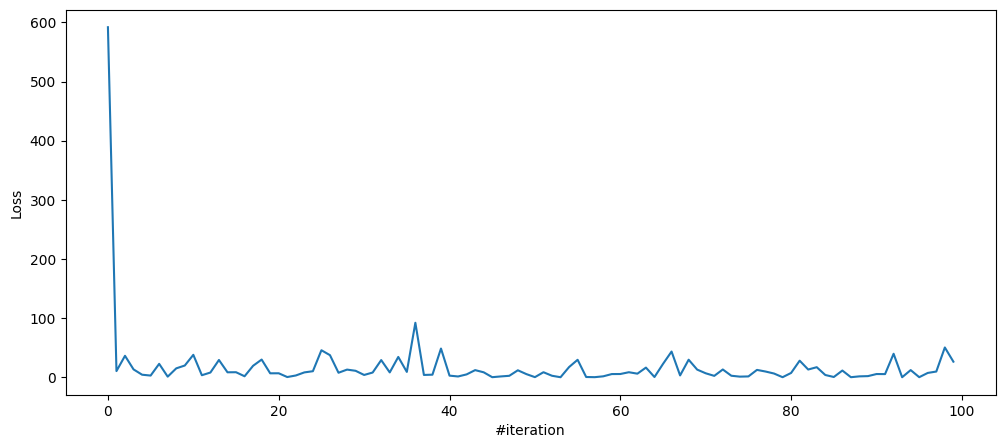

In [182]:
X,y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max= 50, lr=1e-5)
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(L[0:100])
ax.set_xlabel('#iteration')
ax.set_ylabel('Loss')
plt.show()

In [184]:
X,y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max= 50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
